# Projeto Final - Aprendizado de Máquinas I
# PES 03 - Professor George Darmiton da Cunha Cavalcanti

## Michele Beatriz Lopes Farias
## Rafael Couto de Oliveira
---

# 0.0 Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from mlxtend.plotting import plot_decision_regions

# 1.0 Carregando dados

https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification/data?select=train.csv


Ela classifica o preço de telefones celulares como: low cost, medium cost, high cost e very high cost de acordo com algumas características de cada aparelho

Dados disponiveis em duas amostras: Treino e teste..

In [2]:
df= pd.read_csv('train.csv')

teste = pd.read_csv('test.csv')

# 2.0 Pre processamento dos dados

## 2.1 Tamanho dos dados

In [3]:
print (f'Número de linhas: {df.shape[0]}')
print (f'Número de colunas: {df.shape[1]}')

Número de linhas: 2000
Número de colunas: 21


## 2.2 Data info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## 2.3 Verificação de valores nulos

In [6]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## 2.4 Ajuste das colunas

### 2.4.2 Ajustando tipo das colunas

In [7]:
# Converter colunas para booleano
colunas_bool = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
df[colunas_bool] = df[colunas_bool].astype('boolean')

# Converter coluna 'price_range' para categoria
df['price_range'] = df['price_range'].astype('category')

## 2.6 Feature Engineering

In [8]:
df['camera_px'] =  df['fc'] + df['pc']

# 3.0 Descrição dos dados

In [9]:
# Ajustar a configuração de exibição para mostrar todas as colunas
pd.set_option('display.max_columns', None)
df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,camera_px
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,14.226000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,9.463916
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,7.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,14.000000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,21.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,39.000000


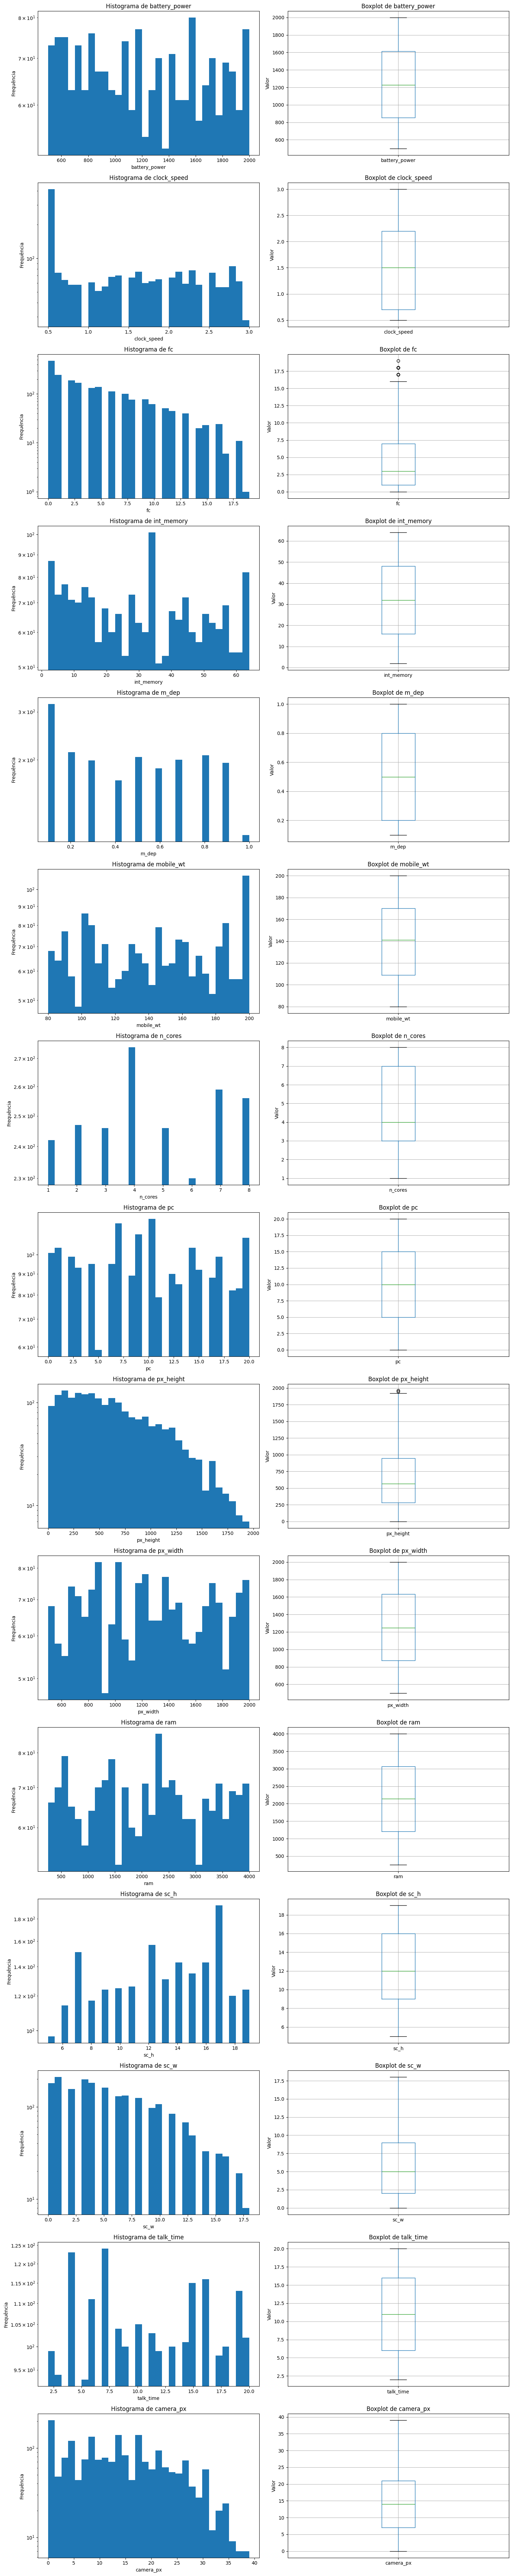

In [10]:
# Selecionando apenas as colunas numericas
colunas_numericas = df.select_dtypes(include=['number']).columns.tolist()

#calculando numero de linhas do plot
nlinhas = len(colunas_numericas)

# Configurar o layout dos subplots
fig, axes = plt.subplots(nrows=nlinhas, ncols=2, figsize=(15, 5*nlinhas))


# Plotar um histograma e boxplot para cada coluna numérica
for i, col in enumerate(colunas_numericas):
    #plot do histograma
    ax_hist = axes[i, 0]
    df[col].plot(kind='hist', bins=30, ax=ax_hist, title=f'Histograma de {col}', log=True)
    ax_hist.set_xlabel(col)
    ax_hist.set_ylabel('Frequência')
    
    # Plotar o boxplot
    ax_box = axes[i, 1]
    df.boxplot(column=col, ax=ax_box)
    ax_box.set_title(f'Boxplot de {col}')
    ax_box.set_xlabel('')
    ax_box.set_ylabel('Valor')

# Ajustar o layout
plt.tight_layout()
plt.show()

## 3.2 Dados categóricos

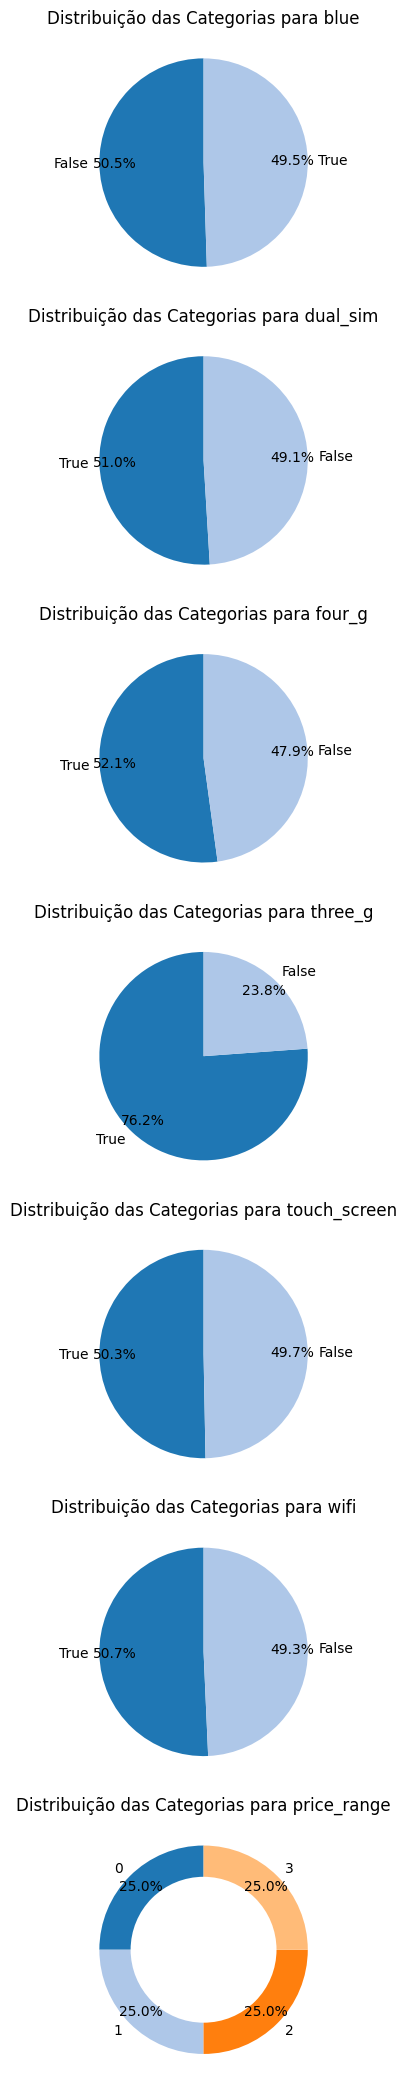

In [11]:
# Selecionando apenas as colunas categóricas
colunas_categoricas = df.select_dtypes(include=['bool', 'category']).columns.tolist()

#calculando numero de linhas do plot
nlinhas = len(colunas_categoricas)

# Configurar o layout dos subplots
fig, axes = plt.subplots(nrows=nlinhas, figsize=(10, 3*nlinhas))


# Plotar um gráfico de pizza para cada coluna categórica
for i, col in enumerate(colunas_categoricas):
    ax = axes[i]
    value_counts = df[col].value_counts()
    sizes = value_counts.values
    labels = value_counts.index

    # Gráfico de Pizza
    wedges, texts, autotexts = ax.pie(
        sizes, 
        labels=labels, 
        autopct='%1.1f%%', 
        startangle=90,
        pctdistance=0.85,
        colors=plt.get_cmap('tab20').colors  # Usando uma colormap para cores variadas
    )

    # Adicionar valores diretamente nas fatias
    for text in autotexts:
        text.set_color('black')

    # Adicionar um círculo branco no centro para um visual de donut
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    ax.set_title(f'Distribuição das Categorias para {col}')

# Ajustar o layout
plt.tight_layout()
plt.show()

## 3.3  Correlação entre os dados

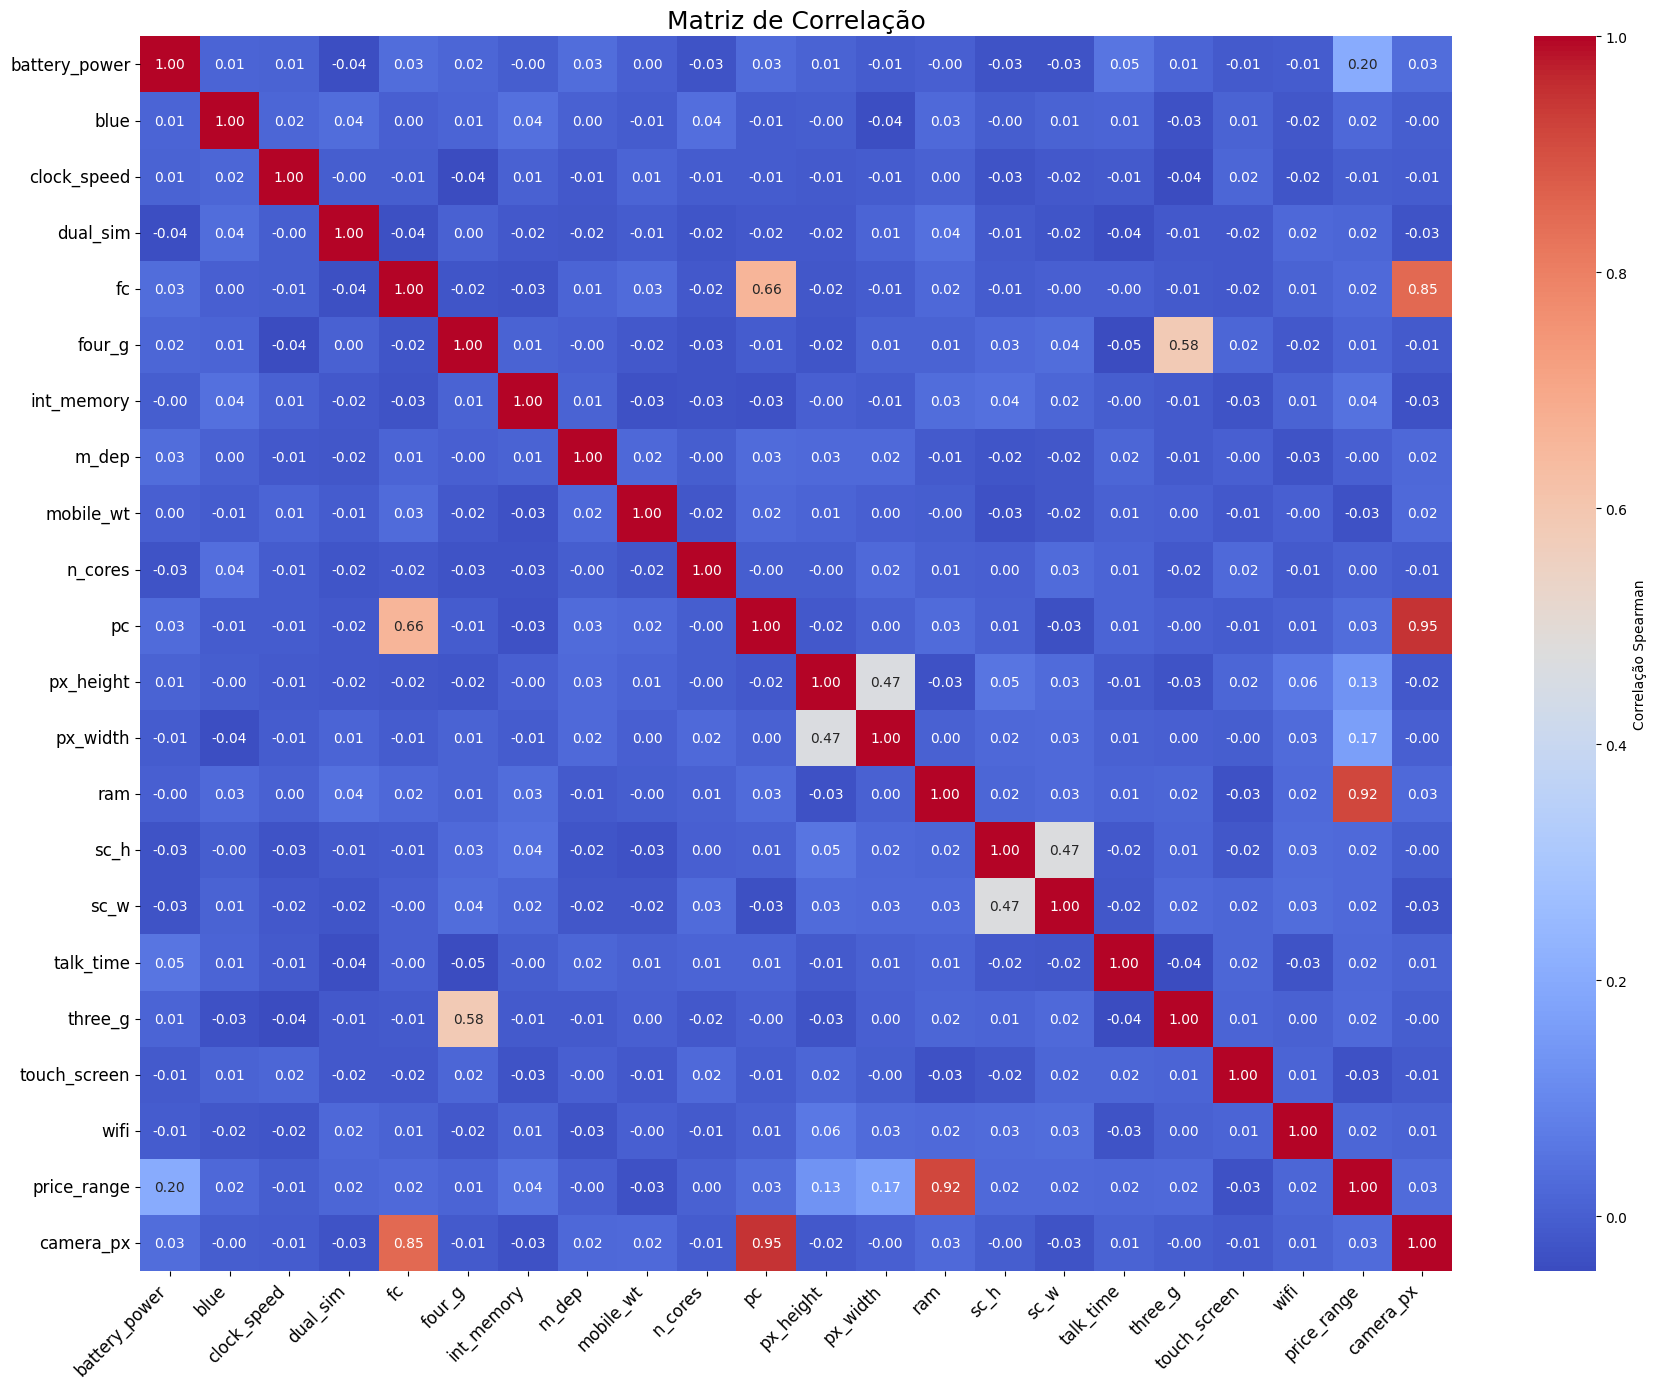

In [12]:
# Calculando a matriz de correlação
correlation_matrix = df.corr(method='spearman')

# Plotando a matriz de correlação com ajustes
plt.figure(figsize=(18, 14))  # Aumentar o tamanho da figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", 
            annot_kws={"size": 10},  # Ajustar o tamanho do texto das anotações
            cbar_kws={'label': 'Correlação Spearman'})  # Legenda da barra de cores
plt.title('Matriz de Correlação', fontsize=18)  # Aumentar o tamanho do título
plt.xticks(rotation=45, ha='right', fontsize=12)  # Ajustar a rotação e o tamanho dos rótulos do eixo x
plt.yticks(rotation=0, fontsize=12)  # Ajustar a rotação e o tamanho dos rótulos do eixo y
plt.tight_layout()  # Ajustar layout para melhor visualização
plt.show()

## 3.4  Distribuição por target



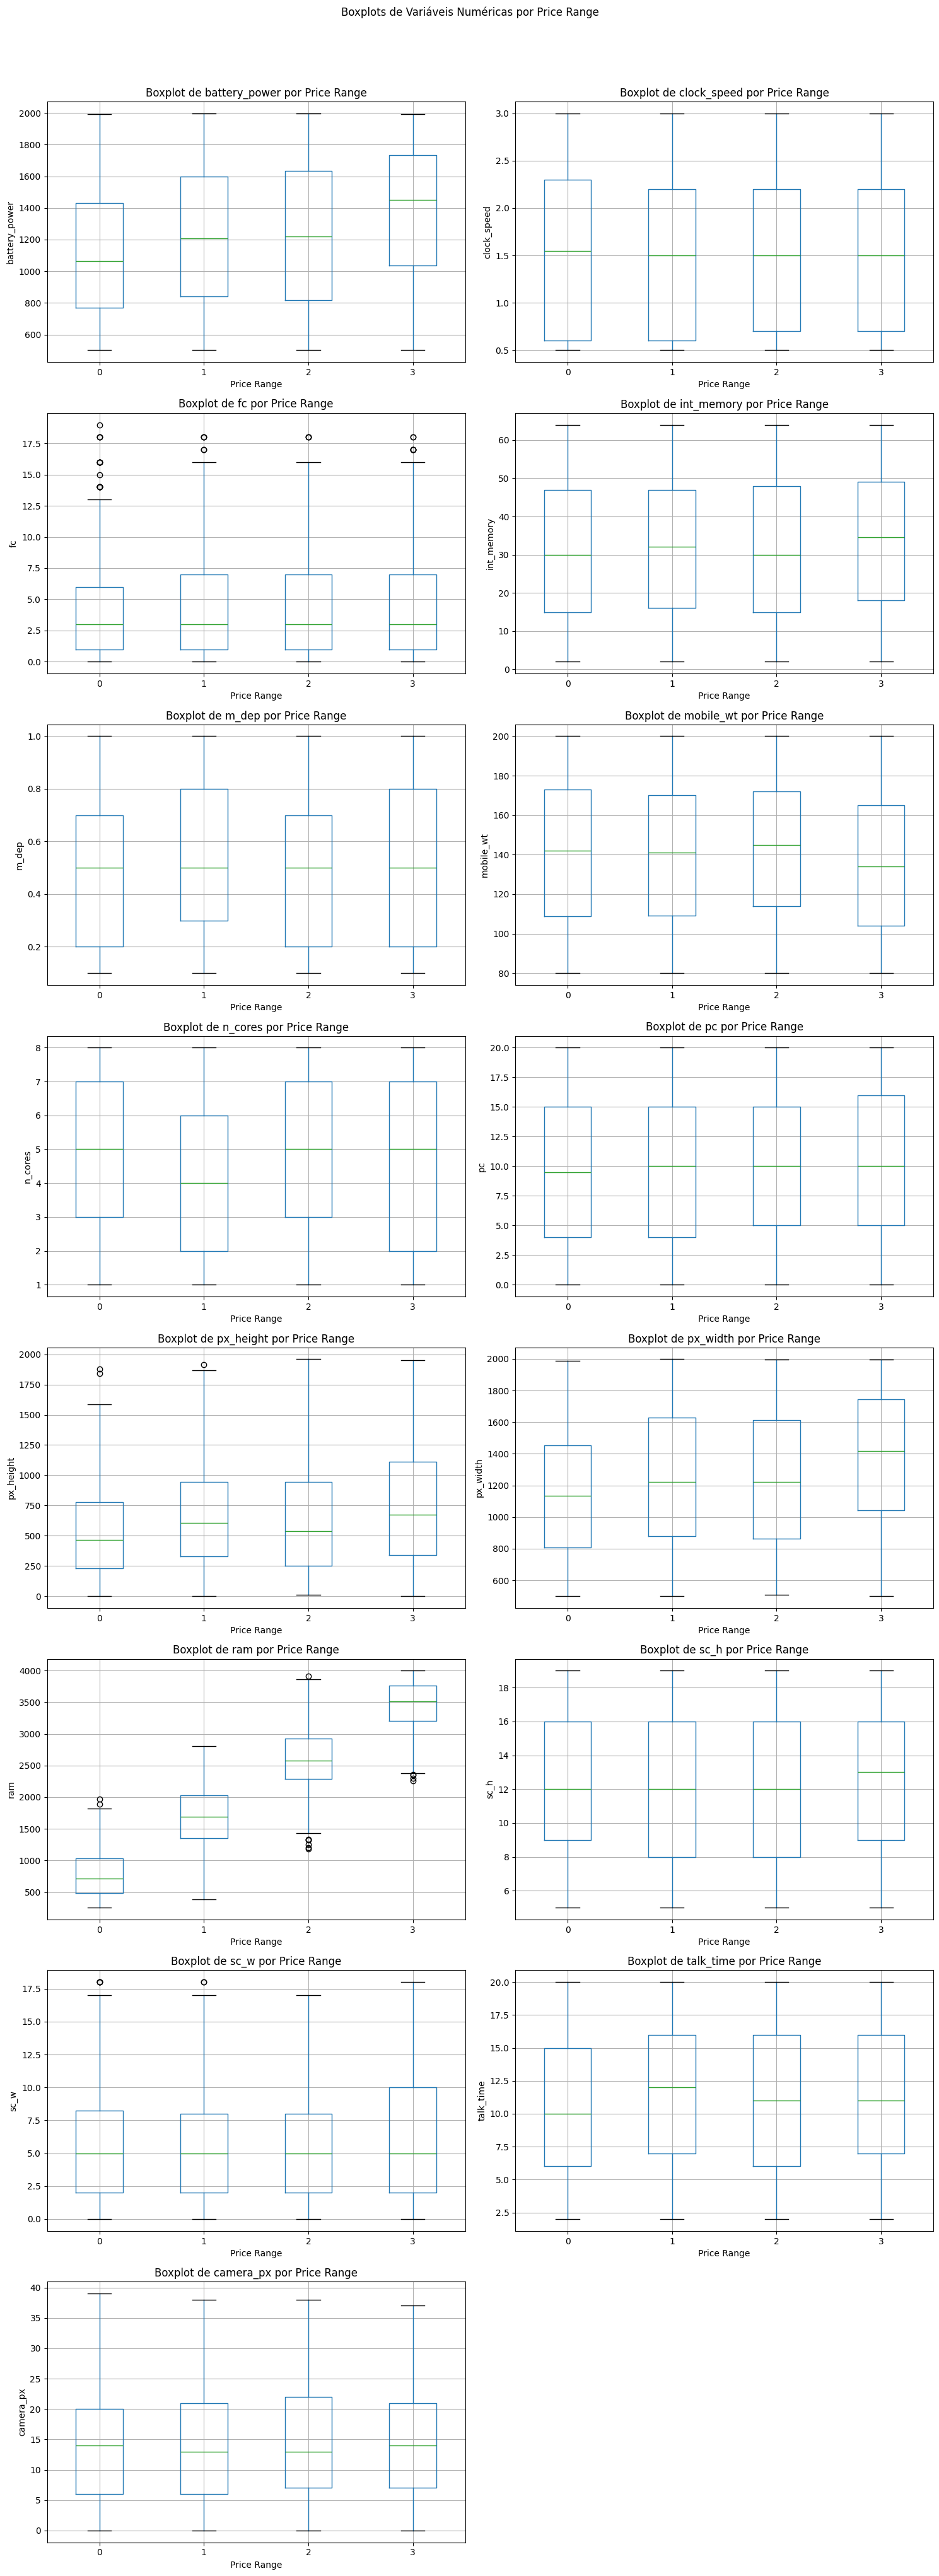

In [15]:
## plotar boxplot dos 4 targets por coluna
# Selecionar apenas as colunas numéricas (excluindo 'price_range')
colunas_numericas = df.select_dtypes(include=['number']).columns.tolist()

# Calculando o número de linhas para o grid de subplots
nlinhas = len(colunas_numericas)

# Configurar o layout dos subplots
fig, axes = plt.subplots(nrows=(nlinhas+1) // 2, ncols=2, figsize=(15, 5 * ((nlinhas + 1) // 2)))

# Achatar o array de eixos para fácil iteração
axes = axes.flatten() if nlinhas > 1 else [axes]

# Plotar um boxplot para cada variável numérica
for i, col in enumerate(colunas_numericas):
    ax = axes[i]
    df.boxplot(column=col, by='price_range', ax=ax)
    ax.set_title(f'Boxplot de {col} por Price Range')
    ax.set_xlabel('Price Range')
    ax.set_ylabel(col)

# Remover os subplots não utilizados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar o layout
plt.suptitle('Boxplots de Variáveis Numéricas por Price Range', y=1.02)
plt.tight_layout()
plt.show()

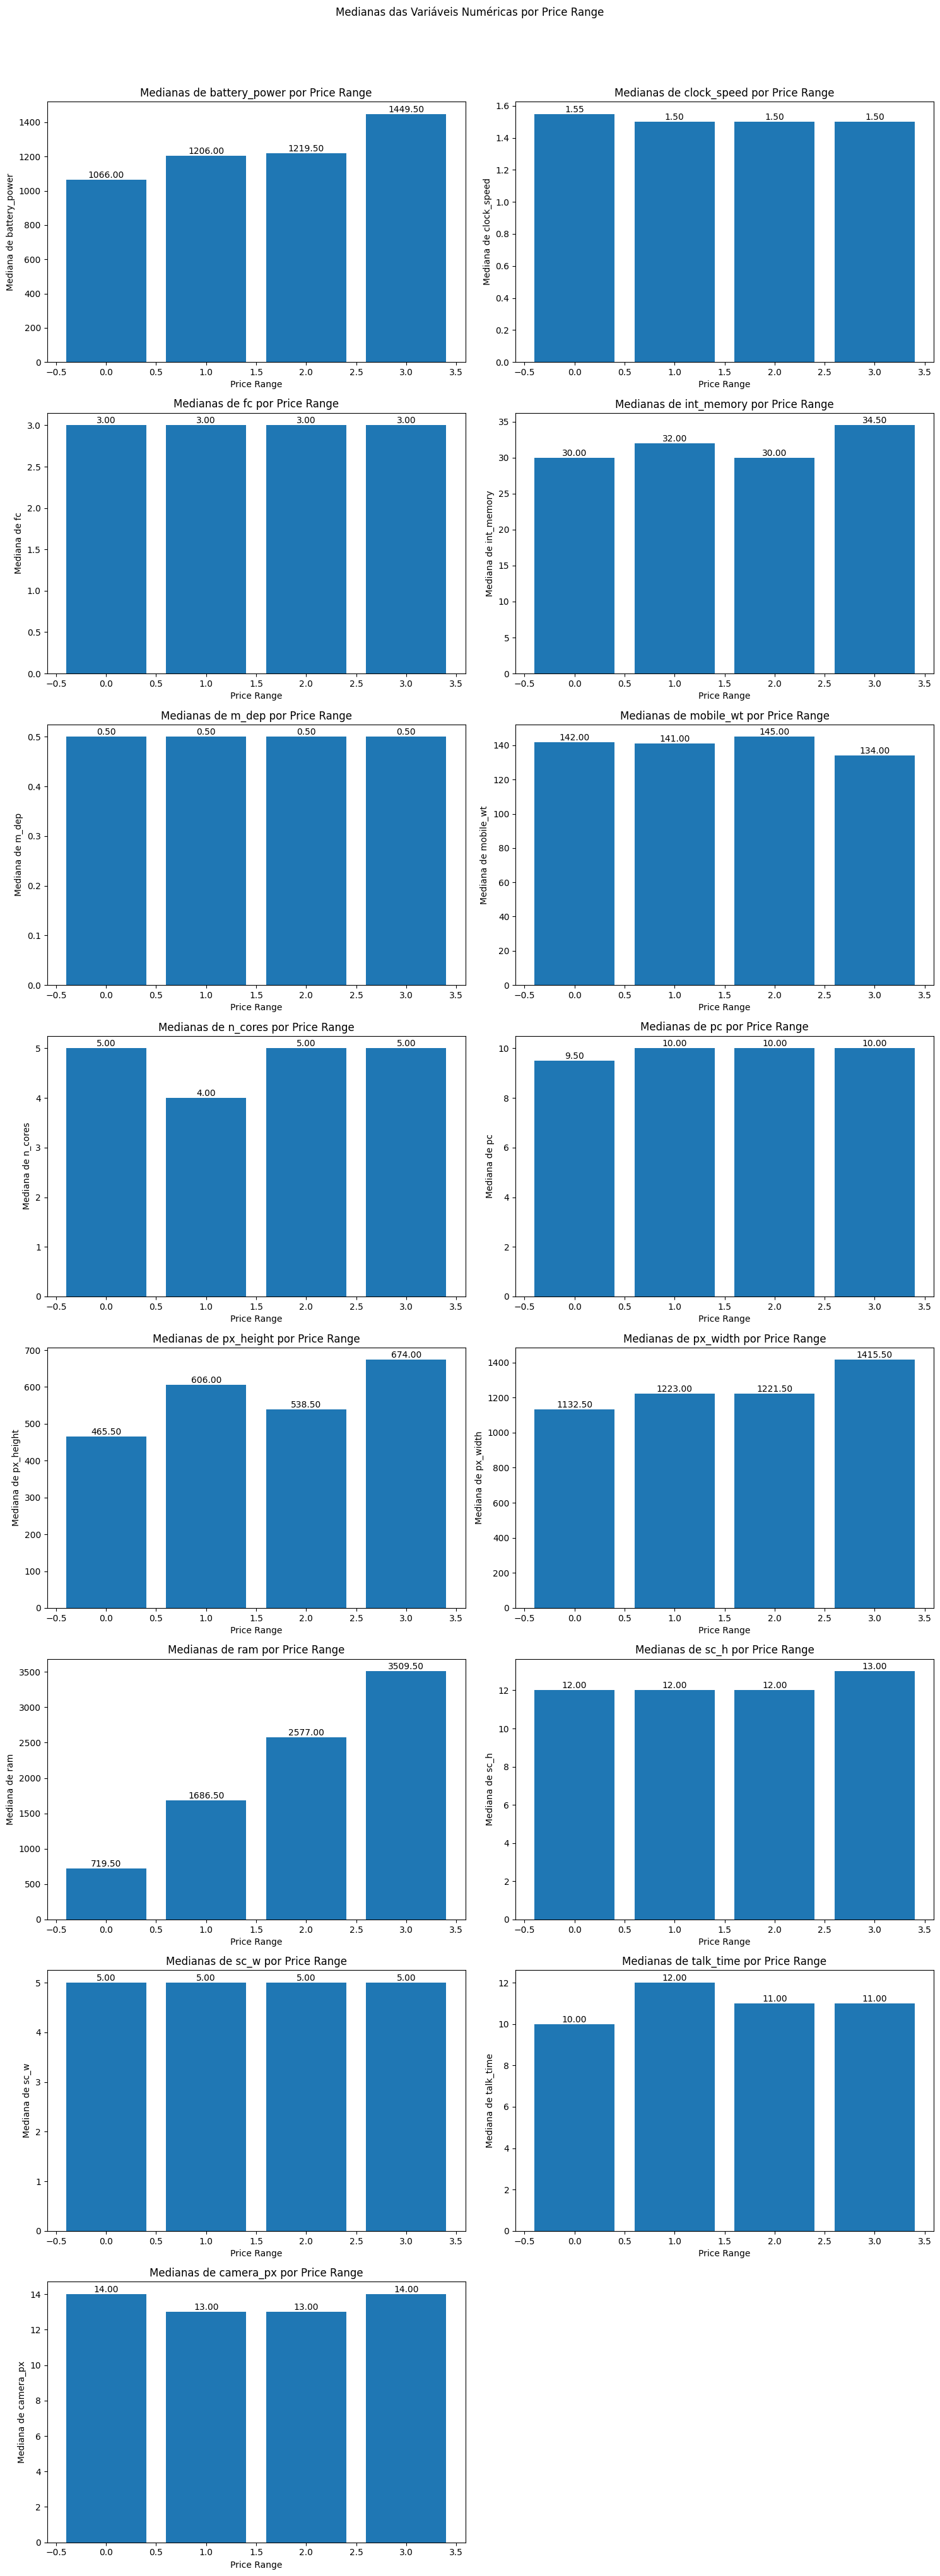

In [16]:
# Configurar o layout dos subplots
fig, axes = plt.subplots(nrows=(nlinhas + 1) // 2, ncols=2, figsize=(15, 5 * ((nlinhas + 1) // 2)))

# Achatar o array de eixos para fácil iteração
axes = axes.flatten() if nlinhas > 1 else [axes]

# Plotar gráficos de barras para as medianas de cada variável numérica
for i, col in enumerate(colunas_numericas):
    ax = axes[i]
    
    # Calcular medianas por price_range
    medians = df.groupby('price_range', observed=False)[col].median().reset_index()
    
    # Plotar gráfico de barras
    ax.bar(medians['price_range'], medians[col])
    ax.set_title(f'Medianas de {col} por Price Range')
    ax.set_xlabel('Price Range')
    ax.set_ylabel(f'Mediana de {col}')
    
    # Adicionar valores nas barras
    for j, value in enumerate(medians[col]):
        ax.text(j, value, f'{value:.2f}', ha='center', va='bottom')

# Remover os subplots não utilizados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar o layout
plt.suptitle('Medianas das Variáveis Numéricas por Price Range', y=1.02)
plt.tight_layout()
plt.show()

# 4.0 Preparação dos dados

In [17]:
df1 = df.copy()

## 4.1 Rescaling

In [18]:
df1.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'camera_px'],
      dtype='object')

In [19]:
rs = RobustScaler()
mms = MinMaxScaler()

# Para variáveis que apresentaram outliers vamos usar o RobustScaler
df1['fc'] = rs.fit_transform( df1[['fc']].values )
df1['px_height'	] = rs.fit_transform( df1[['px_height'	]].values )

# Para variáveis que não apresentaram outliers vamos usar o MinMacscaler
df1['battery_power'] = mms.fit_transform( df1[['battery_power']].values )
df1['clock_speed'] = mms.fit_transform(df1[['clock_speed']].values)
df1['int_memory'] = mms.fit_transform(df1[['int_memory']].values)
df1['m_dep'] = mms.fit_transform(df1[['m_dep']].values)
df1['mobile_wt'] = mms.fit_transform(df1[['mobile_wt']].values)
df1['n_cores'] = mms.fit_transform(df1[['n_cores']].values)
df1['pc'] = mms.fit_transform(df1[['pc']].values)
df1['px_width'] = mms.fit_transform(df1[['px_width']].values)
df1['ram'] = mms.fit_transform(df1[['ram']].values)
df1['sc_h'] = mms.fit_transform(df1[['sc_h']].values)
df1['sc_w'] = mms.fit_transform(df1[['sc_w']].values)
df1['talk_time'] = mms.fit_transform(df1[['talk_time']].values)
df1['camera_px'] = mms.fit_transform(df1[['camera_px']].values)



In [20]:
df1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,camera_px
0,0.227789,False,0.68,False,-0.333333,False,0.080645,0.555556,0.900000,0.142857,0.10,-0.818661,0.170895,0.612774,0.285714,0.388889,0.944444,False,False,True,1,0.076923
1,0.347361,True,0.00,True,-0.500000,True,0.822581,0.666667,0.466667,0.285714,0.30,0.513168,0.993324,0.634687,0.857143,0.166667,0.277778,True,True,False,2,0.153846
2,0.041416,True,0.00,True,-0.166667,True,0.629032,0.888889,0.541667,0.571429,0.30,1.051919,0.811749,0.627205,0.428571,0.111111,0.388889,True,True,False,2,0.205128
3,0.076152,True,0.80,False,-0.500000,False,0.129032,0.777778,0.425000,0.714286,0.45,0.981189,0.858478,0.671566,0.785714,0.444444,0.500000,True,False,False,2,0.230769
4,0.881764,True,0.28,False,1.666667,True,0.677419,0.555556,0.508333,0.142857,0.70,0.969150,0.475300,0.308658,0.214286,0.111111,0.722222,True,True,False,1,0.692308


# 5.0 Feature Selection

In [76]:
def var_x_y(df):
    # Armazenando a variável alvoem X e os atributos em y
    X = df.drop('price_range', axis=1)
    y = df['price_range']
    return X, y

## 5.1 Método 0: Seleção realizada no projeto 1


In [111]:
df_m0 = df1[['battery_power', 'int_memory','mobile_wt','pc', 'px_height', 'px_width', 'ram','touch_screen','sc_w','price_range','camera_px']]

In [112]:
X0, y0 = var_x_y(df_m0)

In [113]:
#Separando o conjunto de dados em treino+valição e teste
X_train0, X_test0, y_train0, y_test0 = train_test_split(X0, y0, test_size=0.2, random_state=42, stratify=df1['price_range'])

## 5.2 Método 1: Eliminando variaveis sem muita correlação com a variavel resposta

In [114]:
# Consideramos toda correlação > |0.03|
df_m1 = df1[['battery_power', 'int_memory','px_height', 'px_width', 'ram','price_range']]

In [115]:
X1, y1 = var_x_y(df_m1)

In [116]:
#Separando o conjunto de dados em treino+valição e teste
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=df1['price_range'])

## 5.3 Método 2: Limiar de Variância 

O limiar de variância é o método mais simples de seleção de atributos (features). Caso a feature não tenha determinada variância, ela deve ser removida.

TALVEZ para esse caso talvez testar alguns valores diferentes de Threshold

Valores típicos:
0.01 - 0.05: Para remover features com variabilidade muito baixa, que são quase constantes.
0.1 - 0.2: Para remover features com variabilidade moderada.
>0.2: Usado com cuidado, pois pode remover features que ainda podem conter informação relevante.

In [117]:
from sklearn.feature_selection import VarianceThreshold

def selecionar_features_por_variancia(df, threshold):
    # Separando X e y
    X, y = var_x_y(df)
    
    # Aplicando o filtro de variância em X
    filter_variance = VarianceThreshold(threshold)
    X_filtered = filter_variance.fit_transform(X)

    # Recuperando os nomes das colunas selecionadas
    colunas_selecionadas = X.columns[filter_variance.get_support()]
    
    # Convertendo o resultado de volta para um DataFrame
    X_filtered_df = pd.DataFrame(X_filtered, columns=colunas_selecionadas)
    
    return X_filtered_df, y

# Exemplo de uso
X2, y2 = selecionar_features_por_variancia(df1, threshold=0.2)

print(f"Número inicial de features: {df1.shape[1] - 1}")  # Subtraindo a variável alvo
print(f"Features selecionadas: {X2.shape[1]}")
print("Colunas selecionadas:")
print(X2.columns.tolist())

Número inicial de features: 21
Features selecionadas: 7
Colunas selecionadas:
['blue', 'dual_sim', 'fc', 'four_g', 'px_height', 'touch_screen', 'wifi']


In [118]:
#Separando o conjunto de dados em treino+valição e teste
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=df1['price_range'])

## 5.4 Método 3:

Sugestão, testar a seleção de features da árvore de decisão

In [ ]:
df_m3 =

In [ ]:
#Separando o conjunto de dados em treino+valição e teste
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42, stratify=df1['price_range'])

# 6.0 Machine Learning Modelling

## 6.1 Função para gerar as metricas

In [121]:
def generate_metrics_table_and_confusion_matrices(model, params, datasets, names):
    # Criar uma lista para armazenar as métricas
    metrics_list = []
    
    fig, axes = plt.subplots(len(datasets), 2, figsize=(10, 5 * len(datasets)))
    fig.tight_layout(pad=5.0)
    
    for i, (X_train, X_test, y_train, y_test) in enumerate(datasets):
        # Separar em treino e validação
        X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)
        
        # Ajustar o modelo com os parâmetros fornecidos
        model.set_params(**params)
        
        # Treinar o modelo
        model.fit(X_train_split, y_train_split)
        
        # Predizer resultados
        y_pred_val = model.predict(X_val)
        y_pred_test = model.predict(X_test)
        
        # Calcular a matriz de confusão
        conf_matrix_val = confusion_matrix(y_val, y_pred_val, labels=np.unique(y_train))
        conf_matrix_test = confusion_matrix(y_test, y_pred_test, labels=np.unique(y_test))
        
        # Calcular as métricas de acurácia e ROC AUC
        accuracy_val = accuracy_score(y_val, y_pred_val)
        accuracy_test = accuracy_score(y_test, y_pred_test)
        
        y_val_bin = label_binarize(y_val, classes=np.unique(y_train))
        y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
        
        y_val_proba = model.predict_proba(X_val)
        y_test_proba = model.predict_proba(X_test)
        
        val_roc_auc = roc_auc_score(y_val_bin, y_val_proba, average='macro', multi_class='ovr')
        test_roc_auc = roc_auc_score(y_test_bin, y_test_proba, average='macro', multi_class='ovr')
        
        # Adicionar as métricas à lista
        metrics_list.append({
            'Dataset': names[i],
            'Accuracy': accuracy_test,
            'ROC AUC': test_roc_auc
        })
        
        # Plotar matrizes de confusão
        class_names = np.unique(y_val).astype(str)
        plot_confusion_matrix(conf_matrix_val, class_names, f'Confusion Matrix - Validação ({names[i]})', axes[i, 0])
        plot_confusion_matrix(conf_matrix_test, class_names, f'Confusion Matrix - Teste ({names[i]})', axes[i, 1])
    
    plt.show()
    
    # Criar um DataFrame a partir da lista de métricas
    metrics_df = pd.DataFrame(metrics_list)
    return metrics_df

def plot_confusion_matrix(conf_matrix, class_names, title, ax):
    cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)
    ax.figure.colorbar(cax, ax=ax)
    
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)
    
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    
    ax.set_title(title)
    
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            ax.text(j, i, format(conf_matrix[i, j], '.2f'),
                     ha="center", va="center",
                     color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")


## 6.2 KNN

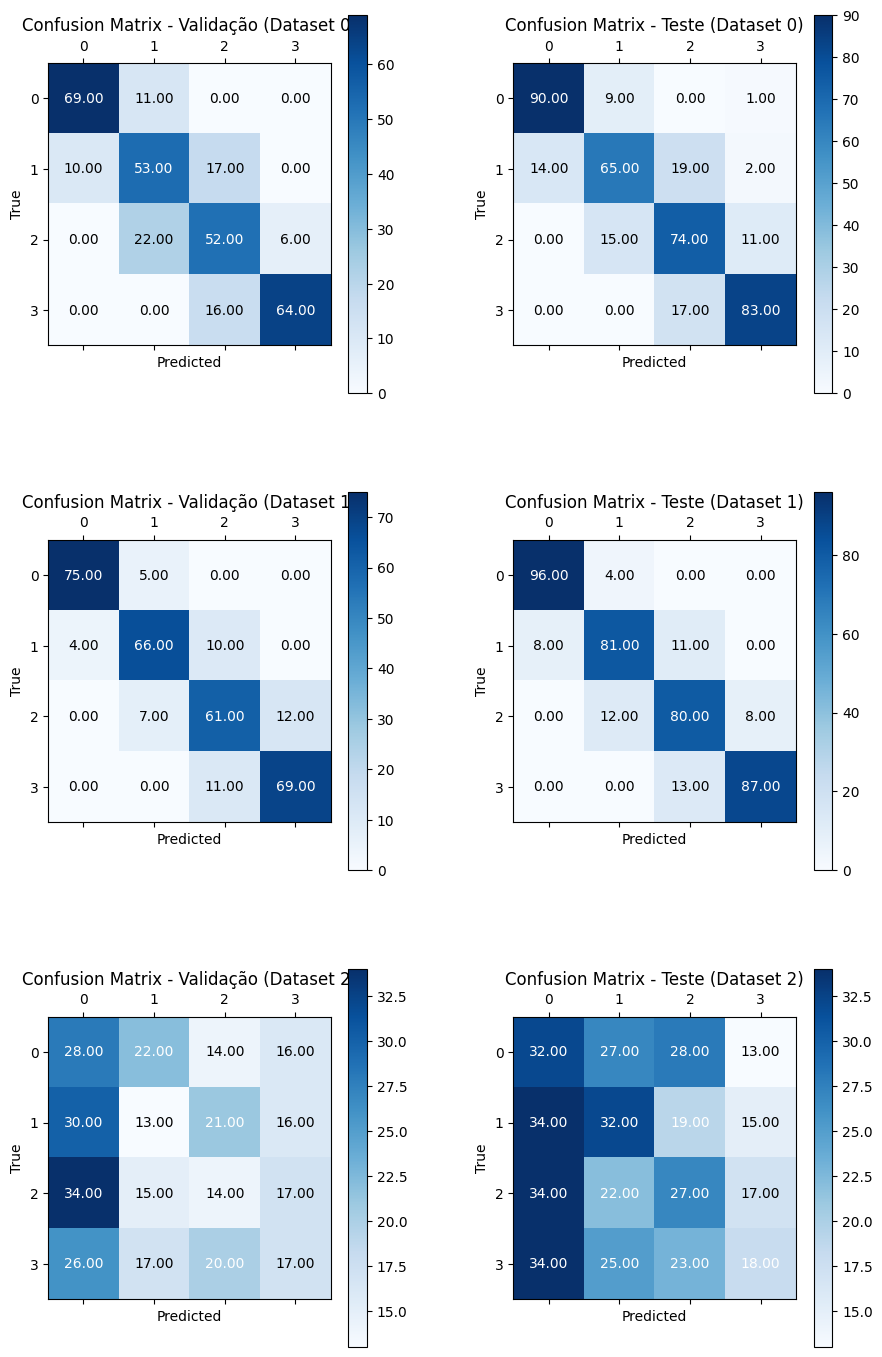

     Dataset  Accuracy   ROC AUC
0  Dataset 0    0.7800  0.919317
1  Dataset 1    0.8600  0.970425
2  Dataset 2    0.2725  0.540679


In [122]:
# Definir o modelo
knn = KNeighborsClassifier()

# Definir os parâmetros do modelo
params = {'metric': 'manhattan', 'n_neighbors': 38}

# Lista de conjuntos de dados e seus nomes
datasets = [
    (X_train0, X_test0, y_train0, y_test0),
    (X_train1, X_test1, y_train1, y_test1),
    (X_train2, X_test2, y_train2, y_test2),
]
names = ['Dataset 0', 'Dataset 1', 'Dataset 2', 'Dataset 3']

# Gerar a tabela de métricas e as matrizes de confusão
metrics_df = generate_metrics_table_and_confusion_matrices(knn, params, datasets, names)

# Exibir a tabela de métricas
print(metrics_df)

## 6.3 Arvore de decisão

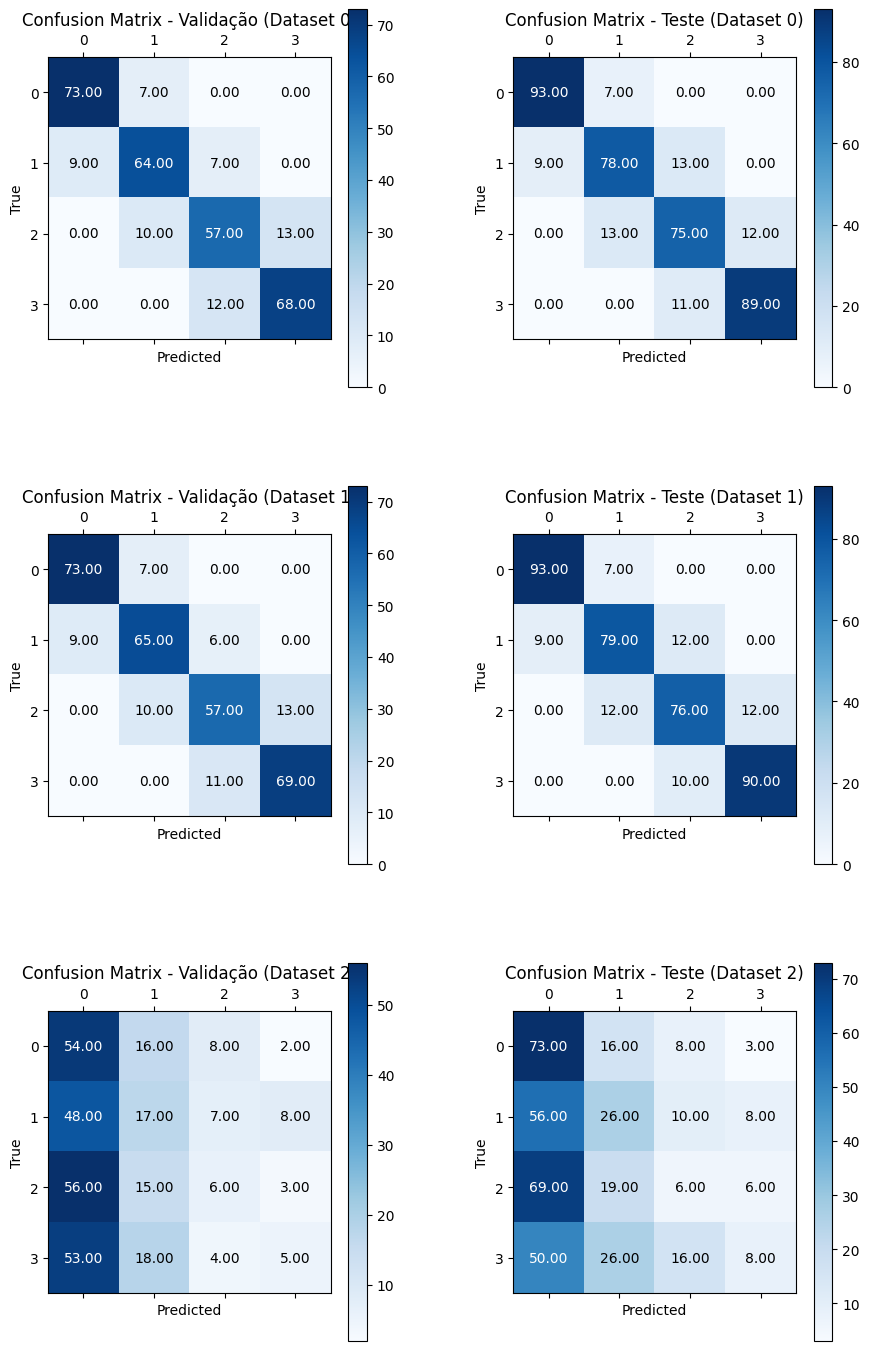

     Dataset  Accuracy   ROC AUC
0  Dataset 0    0.8375  0.940250
1  Dataset 1    0.8450  0.944396
2  Dataset 2    0.2825  0.537900


In [123]:
# Definir o modelo
dt = DecisionTreeClassifier()

# Definir os parâmetros do modelo
params = {'max_depth': 6}	

# Lista de conjuntos de dados e seus nomes
datasets = [
    (X_train0, X_test0, y_train0, y_test0),
    (X_train1, X_test1, y_train1, y_test1),
    (X_train2, X_test2, y_train2, y_test2),
]
names = ['Dataset 0', 'Dataset 1', 'Dataset 2', 'Dataset 3']

# Gerar a tabela de métricas e as matrizes de confusão
metrics_df = generate_metrics_table_and_confusion_matrices(dt, params, datasets, names)

# Exibir a tabela de métricas
print(metrics_df)

## 6.4 MLP

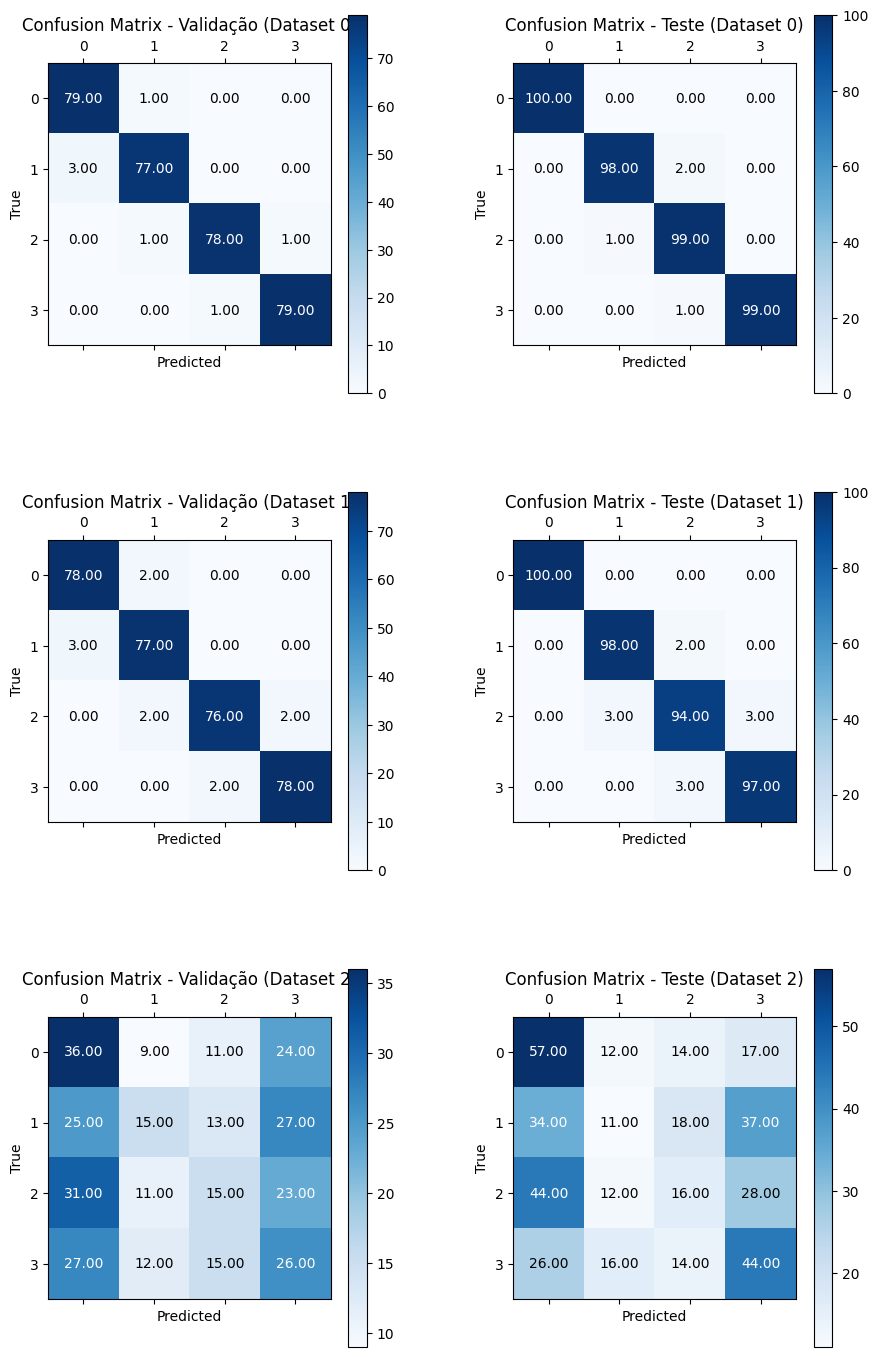

     Dataset  Accuracy   ROC AUC
0  Dataset 0    0.9900  0.999817
1  Dataset 1    0.9725  0.999017
2  Dataset 2    0.3200  0.576458


In [124]:
# Definir o modelo
mlp = MLPClassifier()

# Definir os parâmetros do modelo
params = {
    'activation':'identity', 'hidden_layer_sizes':(2,), 'max_iter':2000
}
# Lista de conjuntos de dados e seus nomes
datasets = [
    (X_train0, X_test0, y_train0, y_test0),
    (X_train1, X_test1, y_train1, y_test1),
    (X_train2, X_test2, y_train2, y_test2),
]
names = ['Dataset 0', 'Dataset 1', 'Dataset 2', 'Dataset 3']

# Gerar a tabela de métricas e as matrizes de confusão
metrics_df = generate_metrics_table_and_confusion_matrices(mlp, params, datasets, names)

# Exibir a tabela de métricas
print(metrics_df)

## 6.5 Nayve Bayes

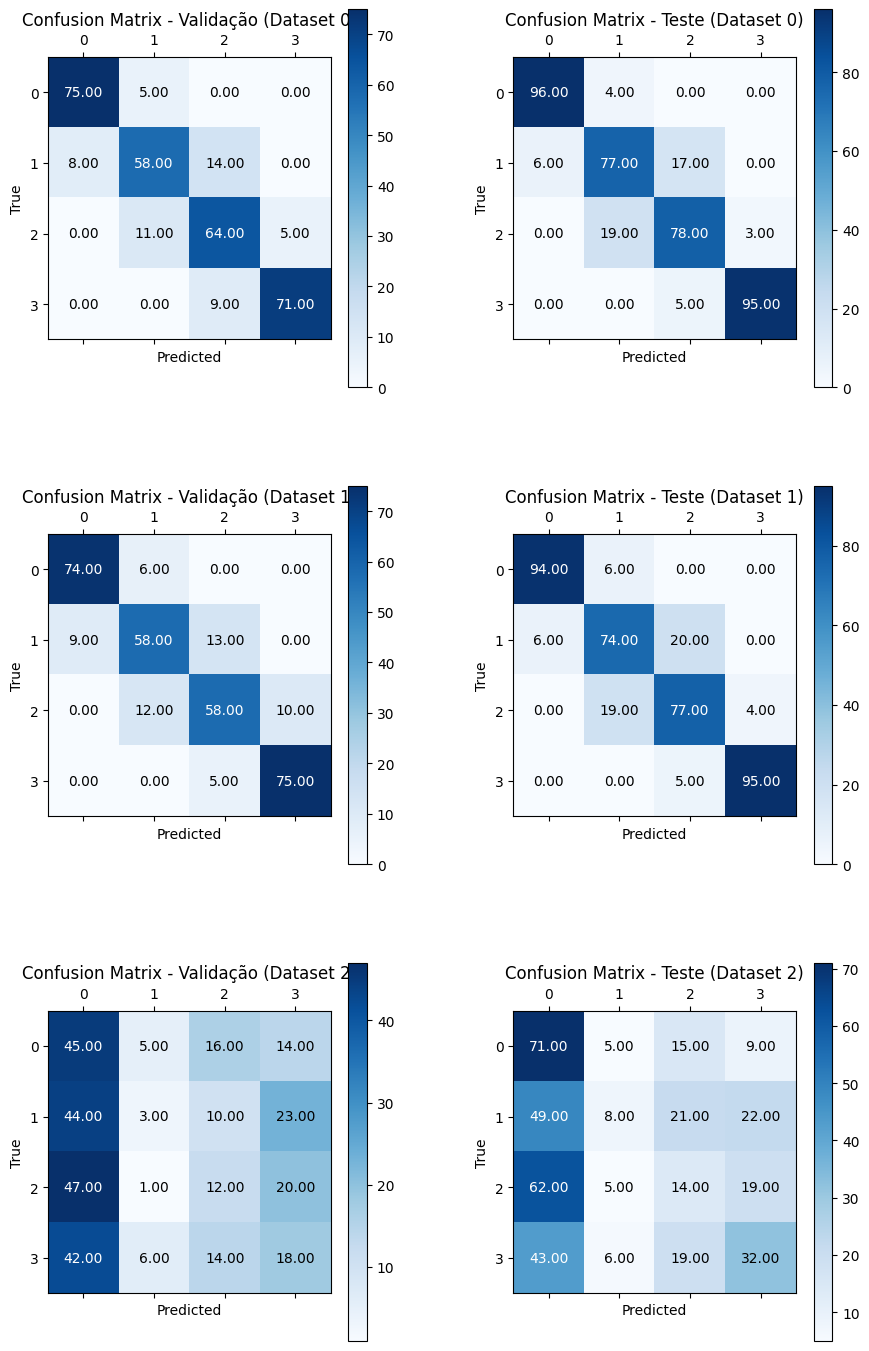

     Dataset  Accuracy   ROC AUC
0  Dataset 0    0.8650  0.962025
1  Dataset 1    0.8500  0.962258
2  Dataset 2    0.3125  0.567375


In [125]:
# Definir o modelo
gnb = GaussianNB()

# Definir os parâmetros do modelo
params = {'var_smoothing': 0.036}	

# Lista de conjuntos de dados e seus nomes
datasets = [
    (X_train0, X_test0, y_train0, y_test0),
    (X_train1, X_test1, y_train1, y_test1),
    (X_train2, X_test2, y_train2, y_test2),
]
names = ['Dataset 0', 'Dataset 1', 'Dataset 2', 'Dataset 3']

# Gerar a tabela de métricas e as matrizes de confusão
metrics_df = generate_metrics_table_and_confusion_matrices(gnb, params, datasets, names)

# Exibir a tabela de métricas
print(metrics_df)

## 6.6 SVM

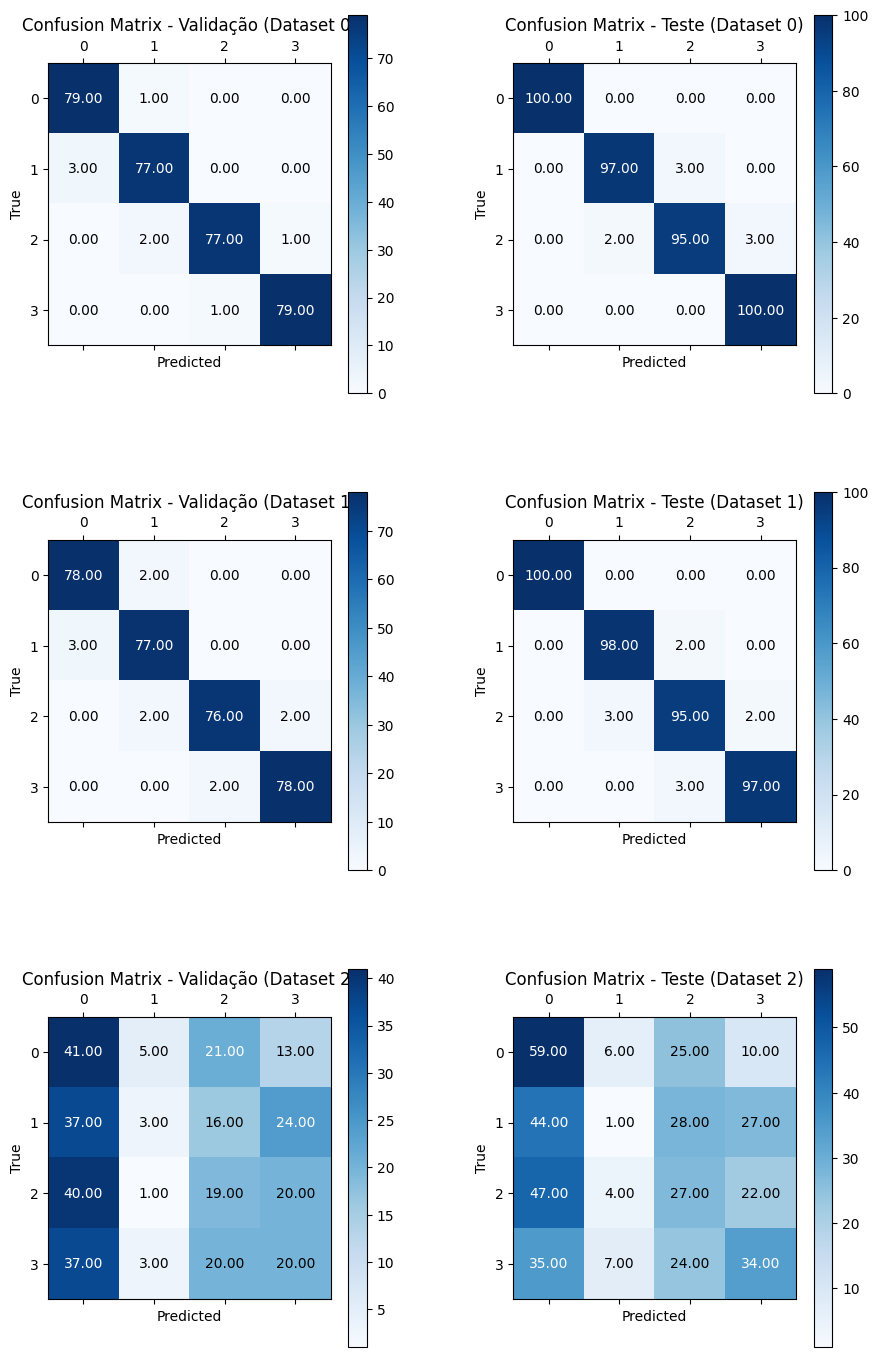

     Dataset  Accuracy   ROC AUC
0  Dataset 0    0.9800  0.999500
1  Dataset 1    0.9750  0.999150
2  Dataset 2    0.3025  0.583325


In [126]:
# Definir o modelo
svm = SVC(probability=True)

# Definir os parâmetros do modelo
params = {
    'C': 50,
    'kernel': 'linear',
    'gamma': 0.01,
    'probability':True
}
# Lista de conjuntos de dados e seus nomes
datasets = [
    (X_train0, X_test0, y_train0, y_test0),
    (X_train1, X_test1, y_train1, y_test1),
    (X_train2, X_test2, y_train2, y_test2),
]
names = ['Dataset 0', 'Dataset 1', 'Dataset 2', 'Dataset 3']

# Gerar a tabela de métricas e as matrizes de confusão
metrics_df = generate_metrics_table_and_confusion_matrices(svm, params, datasets, names)

# Exibir a tabela de métricas
print(metrics_df)

## 6.7 Random Forest

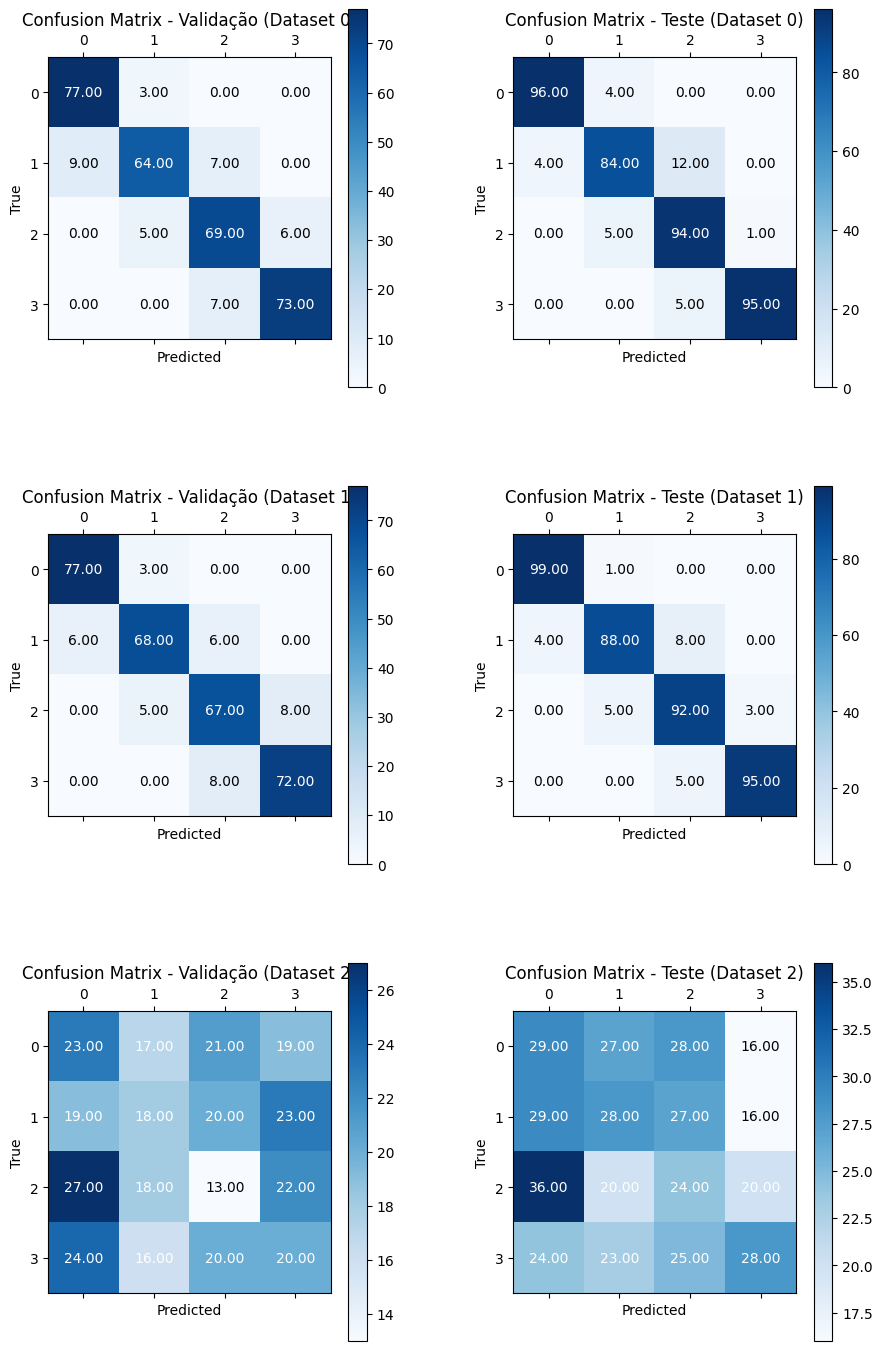

     Dataset  Accuracy   ROC AUC
0  Dataset 0    0.9225  0.986150
1  Dataset 1    0.9350  0.991850
2  Dataset 2    0.2725  0.528054


In [127]:
# Definir o modelo
rf = RandomForestClassifier()

# Definir os parâmetros do modelo
params = {'max_depth': 10, 'n_estimators': 100}	

# Lista de conjuntos de dados e seus nomes
datasets = [
    (X_train0, X_test0, y_train0, y_test0),
    (X_train1, X_test1, y_train1, y_test1),
    (X_train2, X_test2, y_train2, y_test2),
]
names = ['Dataset 0', 'Dataset 1', 'Dataset 2', 'Dataset 3']

# Gerar a tabela de métricas e as matrizes de confusão
metrics_df = generate_metrics_table_and_confusion_matrices(rf, params, datasets, names)

# Exibir a tabela de métricas
print(metrics_df)